# Tabular Data 
### Data -> Data Preprocessing -> Structural & Numerical -> ML Algorithms
### Data Preprocessing
- Missing Values
- Duplicates✅
- Outliers✅
- Structural Errors✅
- Encoding / Dummy variables
- Feature Scaling✅
- Discretization/ Binning

https://github.com/nagarajuekkirala/Mindmaps/blob/main/Data%20Preparation

## Missing Values
##### What are Missing values?
- Missing values refer to instances where data points are absent in the dataset.
- Common in real-world data due to various reasons.
##### Why do missing values occure?
- **Data Collection Issues :** Sensor malfunctions, network issues.
- **Data Entry Errors :** Typos,Misinterpretation.
- **Privacy Concerns :** Opt-out options in surveys.
- **Data Processing and Cleaning :** Removal of Outliers.
- **Integration from Multiple Sources :** Inconsistent data collection.
##### Types of Missing Data : 
- **MCAR(Missing Completely At Random):** Missingness has no relation to any data.
- **MAR(Missing At Random):** Missingness is related to observed data(The feature which does'nt containes missing values.).
- **MNAR(Missing Not At Random):** Missingness is related to unobserved data(The feature which containes missing values.).
##### How missing values impact ML Models?
- **Training Difficulties :** Many agorithms require complete data.
- **Increased Complexity :** Additional preprocessing required.
- **Bias :** Incorrect imputation can introduce bias.
- **Interpretation Issues :** Misleading results from improper handling.
##### How to identify Missing Values?
- NON-Viz
    - isna().sum()
    - isnull().sum()
- Viz
  - Missingno
  - seaborn
##### Methods to Handle Missing Values: 
- Drop❌
- Imputation(filling)✅
  - Univariate
    - Simple Imputer(Statistical)
  - Multivariate
    - KNN Imputer
    - Iterative Imputer

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    "Gender":['Male',np.nan,'Female','Male','Female','Male','Male'],
    "Exp":[2,4,np.nan,3,8,2,7],
    "Salary":[23,45,65,34,80,np.nan,67]
})
df

,Gender,Exp,Salary
0,Male,2.0,23.0
1,NaN,4.0,45.0
2,Female,NaN,65.0
3,Male,3.0,34.0
4,Female,8.0,80.0
5,Male,2.0,NaN
6,Male,7.0,67.0


## Identification

In [3]:
df.isna().sum()

Gender    1
Exp       1
Salary    1
dtype: int64

<Axes: >

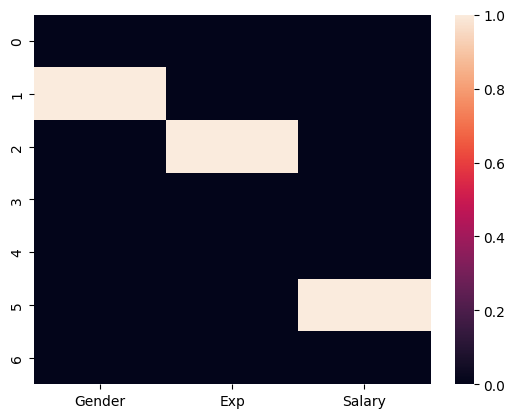

In [4]:
import seaborn as sns
sns.heatmap(df.isna())

## Imputation
### Univariate -> Simple Imputer

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
df

,Gender,Exp,Salary
0,Male,2.0,23.0
1,NaN,4.0,45.0
2,Female,NaN,65.0
3,Male,3.0,34.0
4,Female,8.0,80.0
5,Male,2.0,NaN
6,Male,7.0,67.0


In [7]:
imp = SimpleImputer(strategy='mean')

In [8]:
df['Exp'] = imp.fit_transform(df[['Exp']])

In [9]:
df

,Gender,Exp,Salary
0,Male,2.000000,23.0
1,NaN,4.000000,45.0
2,Female,4.333333,65.0
3,Male,3.000000,34.0
4,Female,8.000000,80.0
5,Male,2.000000,NaN
6,Male,7.000000,67.0


In [10]:
med_imp = SimpleImputer(strategy='median')

In [11]:
df['Salary'] = med_imp.fit_transform(df[['Salary']])

In [12]:
df

,Gender,Exp,Salary
0,Male,2.000000,23.0
1,NaN,4.000000,45.0
2,Female,4.333333,65.0
3,Male,3.000000,34.0
4,Female,8.000000,80.0
5,Male,2.000000,55.0
6,Male,7.000000,67.0


In [13]:
mode_imp = SimpleImputer(strategy='most_frequent')

In [14]:
df[['Gender']] = mode_imp.fit_transform(df[['Gender']])

In [15]:
df

,Gender,Exp,Salary
0,Male,2.000000,23.0
1,Male,4.000000,45.0
2,Female,4.333333,65.0
3,Male,3.000000,34.0
4,Female,8.000000,80.0
5,Male,2.000000,55.0
6,Male,7.000000,67.0


### Multivariate -> KNN Imputer
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html

In [16]:
from sklearn.impute import KNNImputer

In [17]:
df = pd.DataFrame({"Exp":[1,2,3,4,5,6,7,8],
                  "Salary":[10,20,np.nan,40,50,60,70,80]})

In [18]:
knn = KNNImputer(n_neighbors=2)

In [19]:
knn.fit_transform(df)

array([[ 1., 10.],
       [ 2., 20.],
       [ 3., 30.],
       [ 4., 40.],
       [ 5., 50.],
       [ 6., 60.],
       [ 7., 70.],
       [ 8., 80.]])

### Iterative Imputer
- workes based on algorithm it can be any algorithm w.r.t user, but only 1 algorithm.

In [22]:
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
iterative = IterativeImputer(estimator=LinearRegression(),random_state=23)

In [27]:
iterative.fit_transform(df)

array([[ 1., 10.],
       [ 2., 20.],
       [ 3., 30.],
       [ 4., 40.],
       [ 5., 50.],
       [ 6., 60.],
       [ 7., 70.],
       [ 8., 80.]])